# Phase IV Lea Work

In [1]:
# Load libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
sqf2011= pd.read_csv('sqf2011_final_sample')

sqf2019= pd.read_csv('sqf2019_final_sample')

## Defining Functions

### (a) Bootstrapping Function

In [3]:
def bootstrap(df, colname):
    """ Calculate 5000 bootstraps on the colname column in df for a given year. """
    data= df[colname]
    sample_size= data.size
    
    # Bootstrap 5000 times. For each resample, calculate the mean of the sample.
    bootstraps= []

    for i in np.arange(0, 5001):
        resample= np.random.choice(data, sample_size)
        resample_mean= np.average(resample)
        bootstraps= np.append(bootstraps, resample_mean)
        
    return bootstraps

### (b) Contingency Table Function

In [4]:
def get_contingency_table(df, col1_name, col2_name):
    """ Generate a contingency table using the DataFrame df, and the 2 column names provided (Strings) col1_name and col2_name. """
    
    col_a_categories= df[col1_name].unique()
    col_a= pd.Categorical(df[col1_name], categories= col_a_categories)
    
    col_b_categories= df[col2_name].unique()
    col_b= pd.Categorical(df[col2_name], categories= col_b_categories)
    
    return pd.crosstab(col_a, col_b, rownames= [col1_name], colnames= [col2_name])

### (c) Calculate Chi-Squared P-Value Function

In [5]:
def calc_chi_squared(df, col1_name, col2_name):
    """ Calculate the chi-squared p-value of 2 columns from a given DataFrame. """
    cTable= get_contingency_table(df, col1_name, col2_name)
    
    return stats.chi2_contingency(cTable)[1]

## Frisked Predictors (2011)

### (1) Observation Duration

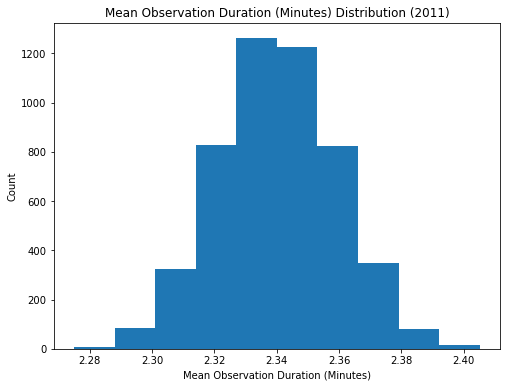

In [6]:
obs_duration_frisked= sqf2011.loc[sqf2011['frisked'] == True]

obs_bootstraps2011= bootstrap(obs_duration_frisked, 'obs_duration')

plt.figure(figsize= (8, 6))
plt.hist(obs_bootstraps2011)
plt.xlabel('Mean Observation Duration (Minutes)')
plt.ylabel('Count')
plt.title('Mean Observation Duration (Minutes) Distribution (2011)')
plt.show()

In [7]:
# Calculate the 95% confidence interval
left_bound = np.percentile(obs_bootstraps2011, 2.5)
right_bound = np.percentile(obs_bootstraps2011, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}) minutes.".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (2.30,  2.38) minutes.


In [8]:
fObs_test_stat2011= np.average(sqf2011.obs_duration)
fObs_pVal2011= sum(obs_bootstraps2011 >= fObs_test_stat2011) / len(obs_bootstraps2011)
fObs_pVal2011 < 0.05

True

### (2) Age

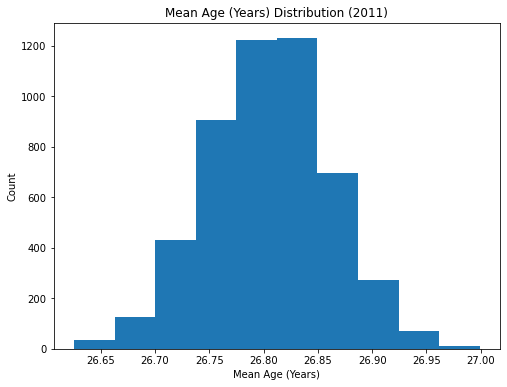

In [9]:
age_frisked= sqf2011.loc[sqf2011['frisked'] == True]

age_bootstraps2011= bootstrap(age_frisked, 'age')

plt.figure(figsize= (8, 6))
plt.hist(age_bootstraps2011)
plt.xlabel('Mean Age (Years)')
plt.ylabel('Count')
plt.title('Mean Age (Years) Distribution (2011)')
plt.show()

In [10]:
# Calculate the 95% confidence interval
left_bound = np.percentile(age_bootstraps2011, 2.5)
right_bound = np.percentile(age_bootstraps2011, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}) minutes.".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (26.69,  26.91) minutes.


In [11]:
fAge_test_stat2011= np.average(sqf2011.age)
fAge_pVal2011= sum(age_bootstraps2011 >= fAge_test_stat2011) / len(age_bootstraps2011)
fAge_pVal2011 < 0.05

True

### (3) Sex

In [12]:
fSex_pVal2011= calc_chi_squared(sqf2011, 'frisked', 'sex')
fSex_pVal2011 < 0.05

True

### (4) Race

In [13]:
fRace_pVal2011= calc_chi_squared(sqf2011, 'frisked', 'race')
fRace_pVal2011 < 0.05

True

### (5) Boro

In [14]:
fBoro_pVal2011= calc_chi_squared(sqf2011, 'frisked', 'boro')
fBoro_pVal2011 < 0.05

True

## Searched Predictors (2011)

### (1) Observation Duration

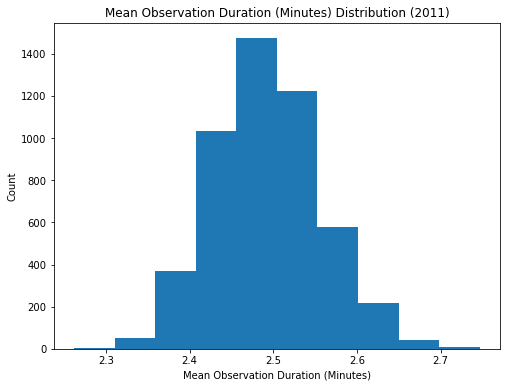

In [15]:
obs_duration_searched= sqf2011.loc[sqf2011['searched'] == True]

obs_bootstraps2011= bootstrap(obs_duration_searched, 'obs_duration')

plt.figure(figsize= (8, 6))
plt.hist(obs_bootstraps2011)
plt.xlabel('Mean Observation Duration (Minutes)')
plt.ylabel('Count')
plt.title('Mean Observation Duration (Minutes) Distribution (2011)')
plt.show()

In [16]:
# Calculate the 95% confidence interval
left_bound = np.percentile(obs_bootstraps2011, 2.5)
right_bound = np.percentile(obs_bootstraps2011, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}) minutes.".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (2.37,  2.63) minutes.


In [17]:
sObs_test_stat2011= np.average(sqf2011.obs_duration)
sObs_pVal2011= sum(obs_bootstraps2011 >= sObs_test_stat2011) / len(obs_bootstraps2011)
sObs_pVal2011 < 0.05

False

### (2) Age

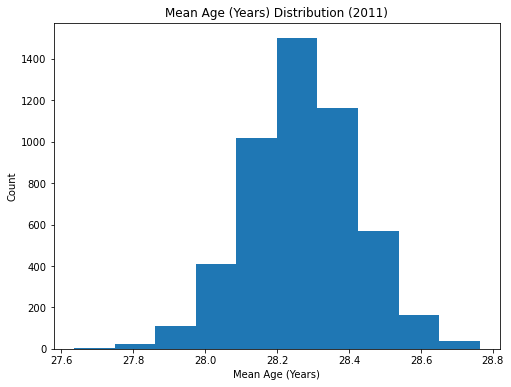

In [18]:
age_searched= sqf2011.loc[sqf2011['searched'] == True]

age_bootstraps2011= bootstrap(age_searched, 'age')

plt.figure(figsize= (8, 6))
plt.hist(age_bootstraps2011)
plt.xlabel('Mean Age (Years)')
plt.ylabel('Count')
plt.title('Mean Age (Years) Distribution (2011)')
plt.show()

In [19]:
# Calculate the 95% confidence interval
left_bound = np.percentile(age_bootstraps2011, 2.5)
right_bound = np.percentile(age_bootstraps2011, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}) minutes.".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (27.97,  28.57) minutes.


In [20]:
sAge_test_stat2011= np.average(sqf2011.age)
sAge_pVal2011= sum(age_bootstraps2011 >= sAge_test_stat2011) / len(age_bootstraps2011)
sAge_pVal2011 < 0.05

False

### (3) Sex

In [21]:
sSex_pVal2011= calc_chi_squared(sqf2011, 'searched', 'sex')
sSex_pVal2011 < 0.05

True

### (4) Race

In [22]:
sRace_pVal2011= calc_chi_squared(sqf2011, 'searched', 'race')
sRace_pVal2011 < 0.05

True

### (5) Boro

In [23]:
sBoro_pVal2011= calc_chi_squared(sqf2011, 'searched', 'boro')
sBoro_pVal2011 < 0.05

True

## Arrest Made Predictors (2011)

### (1) Observation Duration

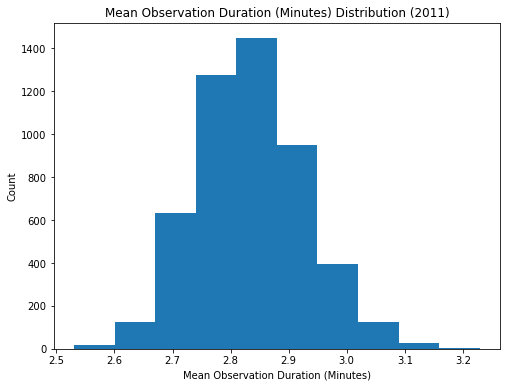

In [24]:
obs_duration_arrest= sqf2011.loc[sqf2011['arstmade'] == True]

obs_bootstraps2011= bootstrap(obs_duration_arrest, 'obs_duration')

plt.figure(figsize= (8, 6))
plt.hist(obs_bootstraps2011)
plt.xlabel('Mean Observation Duration (Minutes)')
plt.ylabel('Count')
plt.title('Mean Observation Duration (Minutes) Distribution (2011)')
plt.show()

In [25]:
# Calculate the 95% confidence interval
left_bound = np.percentile(obs_bootstraps2011, 2.5)
right_bound = np.percentile(obs_bootstraps2011, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}) minutes.".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (2.67,  3.03) minutes.


In [26]:
aObs_test_stat2011= np.average(sqf2011.obs_duration)
aObs_pVal2011= sum(obs_bootstraps2011 >= aObs_test_stat2011) / len(obs_bootstraps2011)
aObs_pVal2011 < 0.05

False

### (2) Age

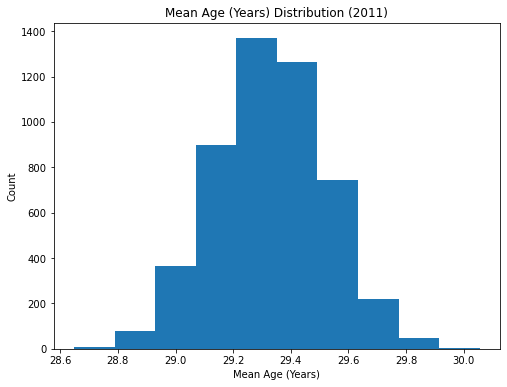

In [27]:
age_arrest= sqf2011.loc[sqf2011['arstmade'] == True]

age_bootstraps2011= bootstrap(age_arrest, 'age')

plt.figure(figsize= (8, 6))
plt.hist(age_bootstraps2011)
plt.xlabel('Mean Age (Years)')
plt.ylabel('Count')
plt.title('Mean Age (Years) Distribution (2011)')
plt.show()

In [28]:
# Calculate the 95% confidence interval
left_bound = np.percentile(age_bootstraps2011, 2.5)
right_bound = np.percentile(age_bootstraps2011, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}) minutes.".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (28.95,  29.71) minutes.


In [29]:
aAge_test_stat2011= np.average(sqf2011.age)
aAge_pVal2011= sum(age_bootstraps2011 >= aAge_test_stat2011) / len(age_bootstraps2011)
aAge_pVal2011 < 0.05

False

### (3) Sex

In [30]:
aSex_pVal2011= calc_chi_squared(sqf2011, 'arstmade', 'sex')
aSex_pVal2011 < 0.05

True

### (4) Race

In [31]:
aRace_pVal2011= calc_chi_squared(sqf2011, 'arstmade', 'race')
aRace_pVal2011 < 0.05

True

### (5) Boro

In [32]:
aBoro_pVal2011= calc_chi_squared(sqf2011, 'arstmade', 'boro')
aBoro_pVal2011 < 0.05

True

-------------

## Frisked Predictors (2019)

### (1) Observation Duration

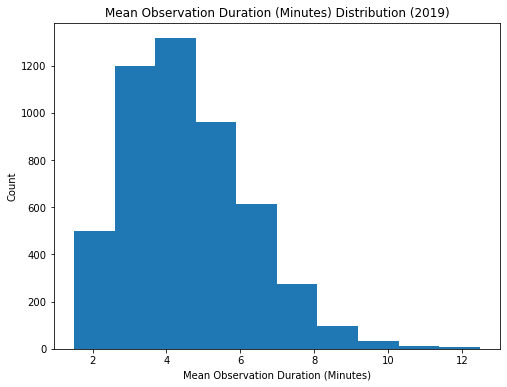

In [33]:
obs_duration_frisked= sqf2019.loc[sqf2019['frisked'] == True]

obs_bootstraps2019= bootstrap(obs_duration_frisked, 'obs_duration')

plt.figure(figsize= (8, 6))
plt.hist(obs_bootstraps2019)
plt.xlabel('Mean Observation Duration (Minutes)')
plt.ylabel('Count')
plt.title('Mean Observation Duration (Minutes) Distribution (2019)')
plt.show()

In [34]:
# Calculate the 95% confidence interval
left_bound = np.percentile(obs_bootstraps2019, 2.5)
right_bound = np.percentile(obs_bootstraps2019, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}).".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (1.71,  8.30).


In [35]:
fObs_test_stat2019= np.average(sqf2019.obs_duration)
fObs_pVal2019= sum(obs_bootstraps2019 >= fObs_test_stat2019) / len(obs_bootstraps2019)
fObs_pVal2019 < 0.05

False

### (2) Age

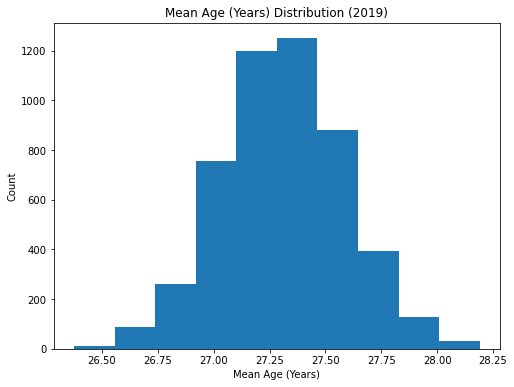

In [36]:
age_frisked= sqf2019.loc[sqf2019['frisked'] == True]

age_bootstraps2019= bootstrap(age_frisked, 'age')

plt.figure(figsize= (8, 6))
plt.hist(age_bootstraps2019)
plt.xlabel('Mean Age (Years)')
plt.ylabel('Count')
plt.title('Mean Age (Years) Distribution (2019)')
plt.show()

In [37]:
# Calculate the 95% confidence interval
left_bound = np.percentile(age_bootstraps2019, 2.5)
right_bound = np.percentile(age_bootstraps2019, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}) minutes.".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (26.76,  27.85) minutes.


In [38]:
fAge_test_stat2019= np.average(sqf2019.obs_duration)
fObs_pVal2019= sum(obs_bootstraps2019 >= fAge_test_stat2019) / len(obs_bootstraps2019)
fObs_pVal2019 < 0.05

False

### (3) Sex

In [39]:
fSex_pVal2019= calc_chi_squared(sqf2019, 'frisked', 'sex')
fSex_pVal2019 < 0.05

True

### (4) Race

In [40]:
fRace_pVal2019= calc_chi_squared(sqf2019, 'frisked', 'race')
fRace_pVal2019 < 0.05

True

### (5) Boro

In [41]:
fBoro_pVal2019= calc_chi_squared(sqf2019, 'frisked', 'boro')
fBoro_pVal2019 < 0.05

True

## Searched Predictors (2019)

### (1) Observation Duration

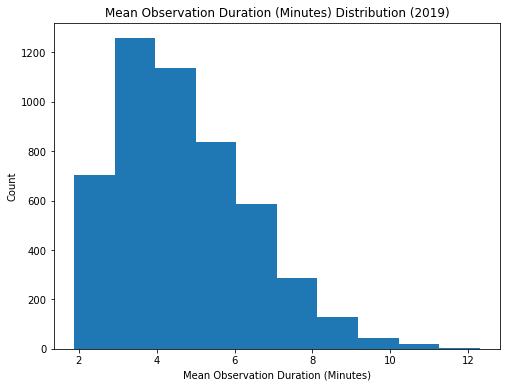

In [42]:
obs_duration_searched= sqf2019.loc[sqf2019['searched'] == True]

obs_bootstraps2019= bootstrap(obs_duration_searched, 'obs_duration')

plt.figure(figsize= (8, 6))
plt.hist(obs_bootstraps2019)
plt.xlabel('Mean Observation Duration (Minutes)')
plt.ylabel('Count')
plt.title('Mean Observation Duration (Minutes) Distribution (2019)')
plt.show()

In [43]:
# Calculate the 95% confidence interval
left_bound = np.percentile(obs_bootstraps2019, 2.5)
right_bound = np.percentile(obs_bootstraps2019, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}).".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (2.17,  8.59).


In [44]:
sObs_test_stat2019= np.average(sqf2019.obs_duration)
sObs_pVal2019= sum(obs_bootstraps2019 >= sObs_test_stat2019) / len(obs_bootstraps2019)
sObs_pVal2019 < 0.05

False

### (2) Age

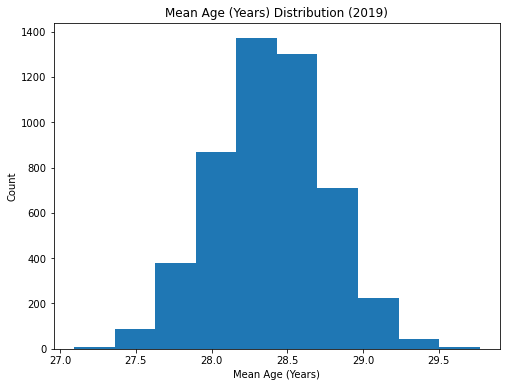

In [45]:
age_searched= sqf2019.loc[sqf2019['searched'] == True]

age_bootstraps2019= bootstrap(age_searched, 'age')

plt.figure(figsize= (8, 6))
plt.hist(age_bootstraps2019)
plt.xlabel('Mean Age (Years)')
plt.ylabel('Count')
plt.title('Mean Age (Years) Distribution (2019)')
plt.show()

In [46]:
# Calculate the 95% confidence interval
left_bound = np.percentile(age_bootstraps2019, 2.5)
right_bound = np.percentile(age_bootstraps2019, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}) minutes.".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (27.66,  29.11) minutes.


In [47]:
sAge_test_stat2019= np.average(sqf2019.obs_duration)
sObs_pVal2019= sum(obs_bootstraps2019 >= sAge_test_stat2019) / len(obs_bootstraps2019)
sObs_pVal2019 < 0.05

False

### (3) Sex

In [48]:
sSex_pVal2019= calc_chi_squared(sqf2019, 'searched', 'sex')
sSex_pVal2019 < 0.05

True

### (4) Race

In [49]:
sRace_pVal2019= calc_chi_squared(sqf2019, 'searched', 'race')
sRace_pVal2019 < 0.05

False

### (5) Boro

In [50]:
sBoro_pVal2019= calc_chi_squared(sqf2019, 'searched', 'boro')
sBoro_pVal2019 < 0.05

False

## Arrest Made Predictors (2019)

### (1) Observation Duration

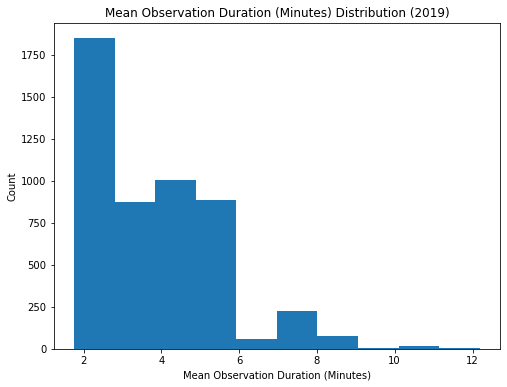

In [51]:
obs_duration_arrest= sqf2019.loc[sqf2019['arstmade'] == True]

obs_bootstraps2019= bootstrap(obs_duration_arrest, 'obs_duration')

plt.figure(figsize= (8, 6))
plt.hist(obs_bootstraps2019)
plt.xlabel('Mean Observation Duration (Minutes)')
plt.ylabel('Count')
plt.title('Mean Observation Duration (Minutes) Distribution (2019)')
plt.show()

In [52]:
# Calculate the 95% confidence interval
left_bound = np.percentile(obs_bootstraps2019, 2.5)
right_bound = np.percentile(obs_bootstraps2019, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}).".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (1.99,  7.38).


In [53]:
aObs_test_stat2019= np.average(sqf2019.obs_duration)
aObs_pVal2019= sum(obs_bootstraps2019 >= aObs_test_stat2019) / len(obs_bootstraps2019)
aObs_pVal2019 < 0.05

False

### (2) Age

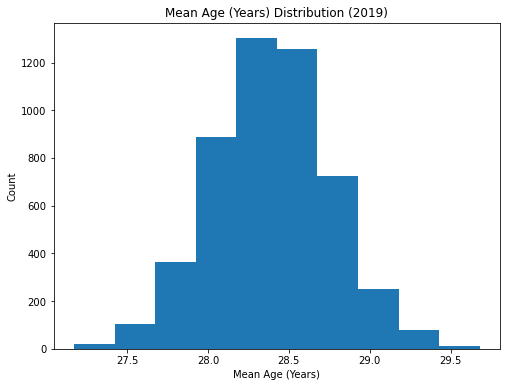

In [54]:
age_arrest= sqf2019.loc[sqf2019['arstmade'] == True]

age_bootstraps2019= bootstrap(age_searched, 'age')

plt.figure(figsize= (8, 6))
plt.hist(age_bootstraps2019)
plt.xlabel('Mean Age (Years)')
plt.ylabel('Count')
plt.title('Mean Age (Years) Distribution (2019)')
plt.show()

In [55]:
# Calculate the 95% confidence interval
left_bound = np.percentile(age_bootstraps2019, 2.5)
right_bound = np.percentile(age_bootstraps2019, 97.5)

conf_interval_print= "The middle 95% confidence interval from the bootstrap estimates is ({:.2f},  {:.2f}) minutes.".format(left_bound, right_bound)
print(conf_interval_print)

The middle 95% confidence interval from the bootstrap estimates is (27.67,  29.12) minutes.


In [56]:
aAge_test_stat2019= np.average(sqf2019.obs_duration)
aObs_pVal2019= sum(obs_bootstraps2019 >= aAge_test_stat2019) / len(obs_bootstraps2019)
aObs_pVal2019 < 0.05

False

### (3) Sex

In [57]:
aSex_pVal2019= calc_chi_squared(sqf2019, 'arstmade', 'sex')
aSex_pVal2019 < 0.05

False

### (4) Race

In [58]:
aRace_pVal2019= calc_chi_squared(sqf2019, 'arstmade', 'race')
aRace_pVal2019 < 0.05

False

### (5) Boro

In [59]:
aBoro_pVal2019= calc_chi_squared(sqf2019, 'arstmade', 'boro')
aBoro_pVal2019 < 0.05

False

--------

## Notes:

- How the Bootstraps were Calculated:
    - Retrieved a subset of the data for a given predictor variable where the target variable == True (Ex: retrieved all age data where frisked == True)
    - Bootstrapped this data 5,000 times (should we increase the number of bootstraps?)
    - Calculated the test statistic for the Null Hypothesis by calculating the average of the entire sample for a given predictor variable
    - Calculated the p-value by calculating the proportion of bootstrapped sample means >= the Null test statistic


- The confidence intervals associated with each bootstrapping are not necessary. I calculated the confidence intervals in the event that we would want to use them in our analysis of the data.